![alt text](header.png "KI Basiskurs")

# KI Basiskurs: Beispiel zu einer einfachen Bildklassifizierung

In diesem Beispiel werden wir ein einfaches Beispiel in der Sprach PYTHON gemeinsam durchgehen. Die folgenden Schritte passieren in diesem Programmcode:
- Importieren aller notwendigen Programmteile
- Laden der Beispieldaten
- Anzeige der Anzahl der Samples
- Anzeige von Beispielen der Daten
- Vorbereitung der Daten für die Klassifizierung
- Erstellen eines leeren Modelle
- Training des Modelles
- Test

Quelle: https://machinelearningmastery.com/how-to-develop-a-convolutional-neural-network-from-scratch-for-mnist-handwritten-digit-classification/

[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/ditomax/mlwifibasis/master?filepath=example_image_classification_MNIST.ipynb)

In [1]:
#
# Fehlermeldungen abschalten: ACHTUNG: keine gute Idee im Allgemeinen, aber für Schulungszwecke zu dulden.
#
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)
simplefilter(action='ignore', category=Warning)

In [2]:
#
# Importieren aller notwendigen Programmteile
#
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD

In [4]:
#
# Ausgabe der Versionen
#
print('working on keras version {} on tensorflow {}'.format ( tf.keras.__version__, tf.version.VERSION ) )

working on keras version 2.4.0 on tensorflow 2.4.1


In [5]:
#
# Einstellungen für Plots
#
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 5]
%matplotlib inline

In [6]:
#
# Laden der Beispieldaten (hier sehr vereinfacht) und Aufteilung in Trainings- und Testdaten
#
(trainX, trainY), (testX, testY) = mnist.load_data()

## Anzeige der Anzahl der Samples

In [7]:
# Anzeige der Anzahl der Samples
print('Trainingsdaten: X=%s, y=%s' % (trainX.shape, trainY.shape))
print('Testdaten: X=%s, y=%s' % (testX.shape, testY.shape))


Trainingsdaten: X=(60000, 28, 28), y=(60000,)
Testdaten: X=(10000, 28, 28), y=(10000,)


## Anzeige von Beispielen der Samples

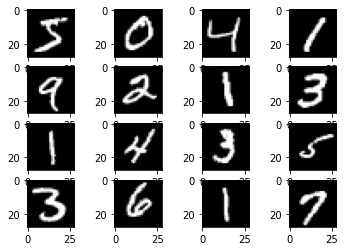

In [8]:
# Anzeige von Beispielen der Daten
for i in range(16):
    plt.subplot(4,4,1 + i)
    plt.imshow(trainX[i], cmap=plt.get_cmap('gray'))
plt.show()


In [9]:
for i in range(16):
    print('label {}'.format(trainY[i]))

label 5
label 0
label 4
label 1
label 9
label 2
label 1
label 3
label 1
label 4
label 3
label 5
label 3
label 6
label 1
label 7


## Vorbereitung der Daten

In [10]:
# Ändere die Matrixform der Daten
trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
testX = testX.reshape((testX.shape[0], 28, 28, 1))


In [11]:
# Ändere Pixelwerte von 0..255 auf einen Wert zwischen 0 und 1 in Flieskommaform
trainX = trainX.astype('float32')
testX = testX.astype('float32')
trainX = trainX / 255.0
testX = testX / 255.0


In [12]:
# Ändere die Zielwerte für die Klassifizierung (eine Vektorstelle pro Klasse)
trainY = to_categorical(trainY)
testY = to_categorical(testY)


In [13]:
trainY[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

## Erstellen eines leeren Modelles

In [14]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))
# compile model
opt = SGD(lr=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])


2022-02-18 09:41:13.688330: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Training des Modelles

In [15]:
model.fit(trainX, trainY, epochs=1, batch_size=64, validation_data=(testX, testY), verbose=1)


2022-02-18 09:41:13.796898: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-02-18 09:41:13.816643: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 4050080000 Hz


938/938 [==============================] - 13s 13ms/step - loss: 0.3239 - accuracy: 0.8952 - val_loss: 0.0507 - val_accuracy: 0.9828


In [16]:
_, acc = model.evaluate(testX, testY, verbose=0)
print('%.2f%% Accuracy' % (acc * 100.0))

98.28% Accuracy


## Testen mit Beispielen aus den Testdaten die fehlschlagen

In [17]:
# Anzeige von Beispielen der Daten die fehlschlagen
from numpy import argmax

plotCount = 0
fig = plt.figure()
fig.suptitle('Predicted vs True Class')

for i in range(testX.shape[0]):
    
    correctClass = argmax(testY[i])
    image = testX[i].reshape((1,28,28,1))
    
    prediction = model.predict([image])    
    predictedClass = np.argmax(prediction[0],axis=1)
        
    if predictedClass != correctClass:
        ax = plt.subplot(330 + 1 + plotCount)
        ax.set_title('{}!={}'.format ( str(predictedClass), str(correctClass)))     
        image = testX[i].reshape((28,28))
        plt.imshow(image, cmap=plt.get_cmap('gray'))    
        plotCount+= 1
        
    if plotCount >= 9:
        break

plt.subplots_adjust(wspace=0.4,hspace=0.4)
plt.show()


NameError: name 'np' is not defined

<Figure size 432x288 with 0 Axes>

## Testen mit einem eigenen Beispielfile

In [ ]:
# Laden weiterer Funktionen
from PIL import Image
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array


In [ ]:
# Funktion für das Laden eines Bildes aus einer Datei
def load_image(filename):
    # load the image
    img = load_img(filename, color_mode = "grayscale", target_size=(28, 28))
    # convert to array
    img = img_to_array(img)
    # reshape into a single sample with 1 channel
    img = img.reshape(1, 28, 28, 1)
    # prepare pixel data
    img = img.astype('float32')
    img = img / 255.0
    return img

In [ ]:
image = load_image('data/8.png')

In [ ]:
imageShow = image.reshape((28,28))
plt.imshow(imageShow, cmap=plt.get_cmap('gray'))


In [ ]:
prediction = model.predict_classes([image])
predictedClass = prediction[0]

In [ ]:
predictedClass